# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
#query_url = f"{url}appid={api_key}"

#target_url = query_url + city.replace(" ", "+") + units
#response = requests.get(target_url)
#response_json = response.json()
#response_json

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key   

city_data = []

print("Beginning Data Retrieval    ")
print("----------------------------")

#counters
record_num =1
set_num = 1

for i, city in enumerate(cities):
   #create groups of 50
    if (i% 50 == 0 and i >= 50):
        set_num += 1
        record_num = 0
        
    #url for the loop to run through
    city_url = query_url + "&q=" + city.replace(" ", "+")
    #print(city_url)
    
    print("Processing Record {} of Set {} | {}".format(record_num, set_num, city))
    
    #update record_num within the loop
    record_num += 1
    
    #request info on each city
    try:
        city_response = requests.get(city_url).json()
        
        #within this response find the data necessary for DataFrame
        city_lat = city_response["coord"]["lat"]
        city_lon = city_response["coord"]["lon"]
        city_max_temp = city_response["main"]["temp_max"]
        city_humidity = city_response["main"]["humidity"]
        city_cloudiness = city_response["clouds"]["all"]
        city_windspeed = city_response["wind"]["speed"]
        city_country = city_response["sys"]["country"]
        city_date = city_response["dt"]
        
        #append the city info to empty list
        city_data.append({"City": city,
                         "Lat": city_lat, 
                         "Lng": city_lon,
                         "Max Temp": city_max_temp, 
                         "Humidity": city_humidity, 
                         "Cloudiness": city_cloudiness, 
                         "Wind Speed": city_windspeed,
                         "Country": city_country, 
                         "Date": city_date})
    #if no city info is found, skip
    except:
        print("City not found. Skipping ...")
        pass
    
print("---------------------")
print("Data Retrieval Complete")
print("---------------------")    




Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | vadso
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | baykit
Processing Record 6 of Set 1 | namibe
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | srednekolymsk
Processing Record 9 of Set 1 | sinegorye
Processing Record 10 of Set 1 | diu
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | tsihombe
City not found. Skipping ...
Processing Record 13 of Set 1 | faro
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | broome
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | faya
Processing Record 19 of Set 1 | saint paul
Processing Record 20 of Set 1 | meyungs
City not found. Skipping ...
Processing Record 21 of Set 1 | the valley
Processing Record 22 of Set 1 | bahia blanca
P

Processing Record 34 of Set 4 | grand river south east
City not found. Skipping ...
Processing Record 35 of Set 4 | trikerion
City not found. Skipping ...
Processing Record 36 of Set 4 | togur
Processing Record 37 of Set 4 | grand gaube
Processing Record 38 of Set 4 | matagami
Processing Record 39 of Set 4 | awjilah
Processing Record 40 of Set 4 | attawapiskat
City not found. Skipping ...
Processing Record 41 of Set 4 | homestead
Processing Record 42 of Set 4 | octeville
Processing Record 43 of Set 4 | greeley
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | dolbeau
City not found. Skipping ...
Processing Record 46 of Set 4 | cacahoatan
Processing Record 47 of Set 4 | pisco
Processing Record 48 of Set 4 | mpika
Processing Record 49 of Set 4 | chokurdakh
Processing Record 0 of Set 5 | dalbandin
Processing Record 1 of Set 5 | sillamae
Processing Record 2 of Set 5 | muisne
Processing Record 3 of Set 5 | hvide sande
Processing Record 4 of Set 5 | hokitika
Processin

Processing Record 19 of Set 8 | santarem
Processing Record 20 of Set 8 | kudahuvadhoo
Processing Record 21 of Set 8 | briancon
Processing Record 22 of Set 8 | saint-pierre
Processing Record 23 of Set 8 | sabaudia
Processing Record 24 of Set 8 | rabo de peixe
Processing Record 25 of Set 8 | samusu
City not found. Skipping ...
Processing Record 26 of Set 8 | maragogi
Processing Record 27 of Set 8 | kysyl-syr
Processing Record 28 of Set 8 | mogadishu
Processing Record 29 of Set 8 | bukachacha
Processing Record 30 of Set 8 | puerto baquerizo moreno
Processing Record 31 of Set 8 | emerald
Processing Record 32 of Set 8 | fortuna
Processing Record 33 of Set 8 | tura
Processing Record 34 of Set 8 | laguna
Processing Record 35 of Set 8 | vila franca do campo
Processing Record 36 of Set 8 | noumea
Processing Record 37 of Set 8 | lima duarte
Processing Record 38 of Set 8 | fort smith
Processing Record 39 of Set 8 | salalah
Processing Record 40 of Set 8 | isla mujeres
Processing Record 41 of Set 8

Processing Record 6 of Set 12 | varadero
Processing Record 7 of Set 12 | utiroa
City not found. Skipping ...
Processing Record 8 of Set 12 | madison
Processing Record 9 of Set 12 | aksarka
Processing Record 10 of Set 12 | jieshi
Processing Record 11 of Set 12 | talnakh
Processing Record 12 of Set 12 | maua
Processing Record 13 of Set 12 | belmopan
Processing Record 14 of Set 12 | homer
Processing Record 15 of Set 12 | wanning
Processing Record 16 of Set 12 | kingman
Processing Record 17 of Set 12 | minab
Processing Record 18 of Set 12 | nezhinka
Processing Record 19 of Set 12 | udachnyy
Processing Record 20 of Set 12 | zhigansk
Processing Record 21 of Set 12 | yorosso
Processing Record 22 of Set 12 | maloshuyka
City not found. Skipping ...
Processing Record 23 of Set 12 | byron bay
Processing Record 24 of Set 12 | great yarmouth
Processing Record 25 of Set 12 | los llanos de aridane
Processing Record 26 of Set 12 | tabarqah
City not found. Skipping ...
Processing Record 27 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#city_dict = {'City': city, 'Lat': [lat], 'Lng': lon, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': windspeed, 'Country': country, 'Date': date}
city_df = pd.DataFrame(city_data)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,39.00,100,90,13.80,US,1618596399
1,tiksi,71.6872,128.8694,-9.56,100,99,5.39,RU,1618596645
2,vadso,70.0744,29.7487,39.20,81,75,20.71,NO,1618596646
3,castro,-24.7911,-50.0119,75.99,45,65,4.47,BR,1618596646
4,baykit,61.6700,96.3700,4.51,85,86,9.53,RU,1618596646
...,...,...,...,...,...,...,...,...,...
542,porto walter,-8.2686,-72.7439,88.92,57,95,3.24,BR,1618596856
543,maraa,-1.8333,-65.3667,86.81,67,95,3.53,BR,1618596857
544,kem,64.9555,34.5793,39.09,78,31,6.08,RU,1618596857
545,mabaruma,8.2000,-59.7833,86.00,66,75,13.80,GY,1618596857


In [6]:
city_df.to_csv("output.csv", index=False)

In [7]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,20.383984,11.421072,61.612413,64.784278,51.400366,9.233309,1.618597e+09
std,32.834369,90.424486,23.701341,23.803397,36.635551,6.108785,8.709887e+01
min,-54.800000,-175.200000,-15.030000,5.000000,0.000000,0.270000,1.618596e+09
25%,-5.377900,-68.407250,46.065000,50.500000,20.000000,4.735000,1.618597e+09
50%,23.283300,14.505300,66.400000,70.000000,51.000000,8.050000,1.618597e+09
75%,47.788700,84.200000,80.600000,83.000000,90.000000,11.520000,1.618597e+09
max,78.218600,179.316700,105.780000,100.000000,100.000000,47.670000,1.618597e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.

idx = city_df.index[city_df['Humidity']]
idx

Int64Index([100, 100,  81,  45,  85,  72,  52, 100,  88,  77,
            ...
             68,  48,  93,  70,  93,  57,  67,  78,  66,  32],
           dtype='int64', length=547)

In [9]:

new_city_df = city_df.drop(city_df.loc[city_df['Humidity'] > 100].index)
new_city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,20.383984,11.421072,61.612413,64.784278,51.400366,9.233309,1.618597e+09
std,32.834369,90.424486,23.701341,23.803397,36.635551,6.108785,8.709887e+01
min,-54.800000,-175.200000,-15.030000,5.000000,0.000000,0.270000,1.618596e+09
25%,-5.377900,-68.407250,46.065000,50.500000,20.000000,4.735000,1.618597e+09
50%,23.283300,14.505300,66.400000,70.000000,51.000000,8.050000,1.618597e+09
75%,47.788700,84.200000,80.600000,83.000000,90.000000,11.520000,1.618597e+09
max,78.218600,179.316700,105.780000,100.000000,100.000000,47.670000,1.618597e+09


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(city_df.loc[city_df['Humidity'] > 100].index, inplace=False)
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,39.00,100,90,13.80,US,1618596399
1,tiksi,71.6872,128.8694,-9.56,100,99,5.39,RU,1618596645
2,vadso,70.0744,29.7487,39.20,81,75,20.71,NO,1618596646
3,castro,-24.7911,-50.0119,75.99,45,65,4.47,BR,1618596646
4,baykit,61.6700,96.3700,4.51,85,86,9.53,RU,1618596646


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

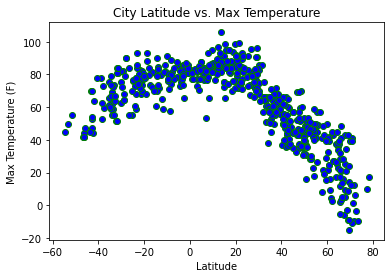

<Figure size 432x288 with 0 Axes>

In [39]:
x_axis = clean_city_data['Lat']
temp = clean_city_data['Max Temp']
                           
plt.scatter(x_axis, temp, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature")
plt.show()


## Latitude vs. Humidity Plot

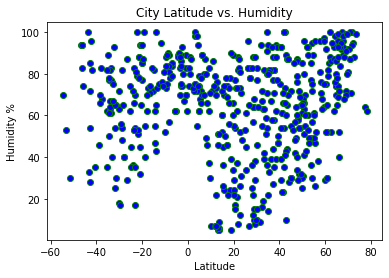

<Figure size 432x288 with 0 Axes>

In [40]:
x_axis = clean_city_data['Lat']
y_axis = clean_city_data['Humidity']
plt.scatter(x_axis, y_axis, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("City Latitude vs. Humidity")
plt.show()


## Latitude vs. Cloudiness Plot

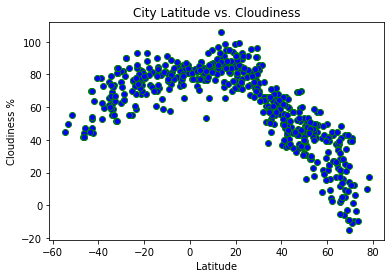

<Figure size 432x288 with 0 Axes>

In [41]:
x_axis = clean_city_data['Lat']
clouds = clean_city_data['Max Temp']
plt.scatter(x_axis, clouds, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("City Latitude vs. Cloudiness")
plt.show()


## Latitude vs. Wind Speed Plot

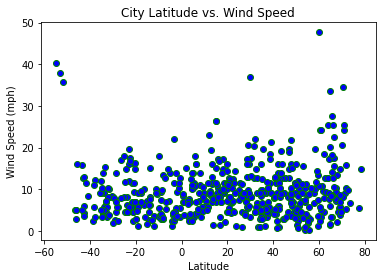

<Figure size 432x288 with 0 Axes>

In [42]:
x_axis = clean_city_data['Lat']
speed = clean_city_data['Wind Speed']
plt.scatter(x_axis, speed, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed")
plt.show()


# # Linear Regression

In [15]:
#determine the north and south hemisphere to pull data from
north_hemisphere = clean_city_data.loc[clean_city_data['Lat'] >= 0]
#north_hemisphere
south_hemisphere = clean_city_data.loc[clean_city_data['Lat'] < 0]
#south_hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

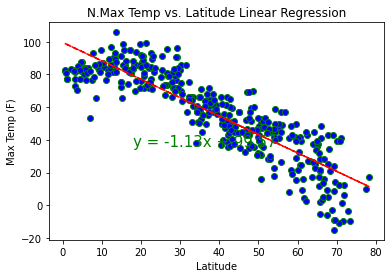

The r-squared value is 0.7758533976111832


<Figure size 432x288 with 0 Axes>

In [43]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("N.Max Temp vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

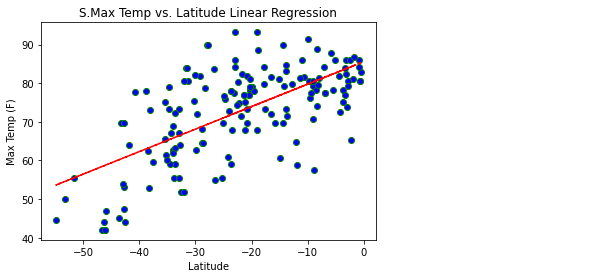

The r-squared value is 0.42279838487949184


<Figure size 432x288 with 0 Axes>

In [44]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("S.Max Temp vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

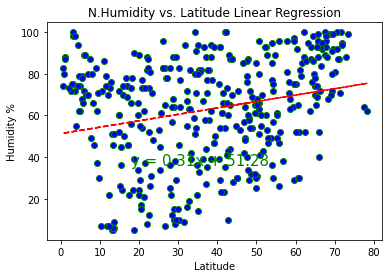

The r-squared value is 0.06109094418218293


<Figure size 432x288 with 0 Axes>

In [45]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("N.Humidity vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

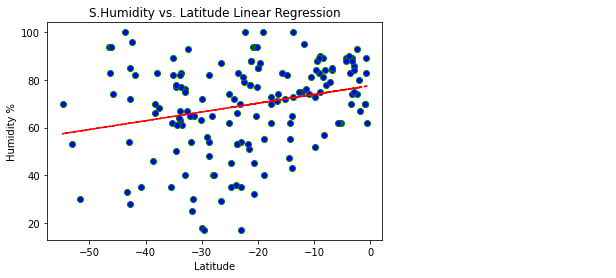

The r-squared value is 0.0634551207515364


<Figure size 432x288 with 0 Axes>

In [46]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("S.Humidity vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

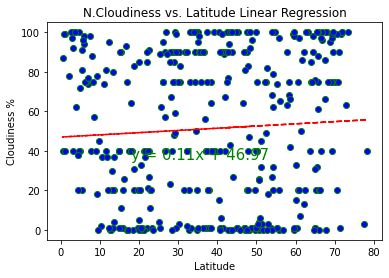

The r-squared value is 0.0035955899411482597


<Figure size 432x288 with 0 Axes>

In [47]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("N.Cloudiness vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

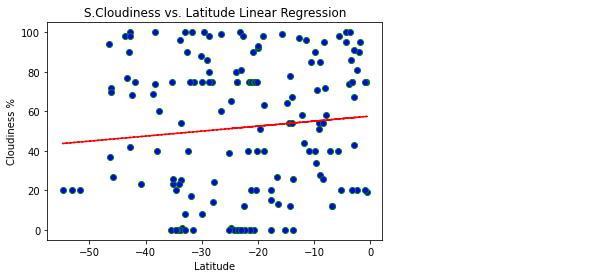

The r-squared value is 0.009500007395838181


<Figure size 432x288 with 0 Axes>

In [48]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("S.Cloudiness vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

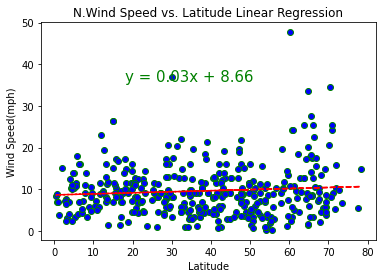

The r-squared value is 0.007160813063447948


<Figure size 432x288 with 0 Axes>

In [50]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("N.Wind Speed vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

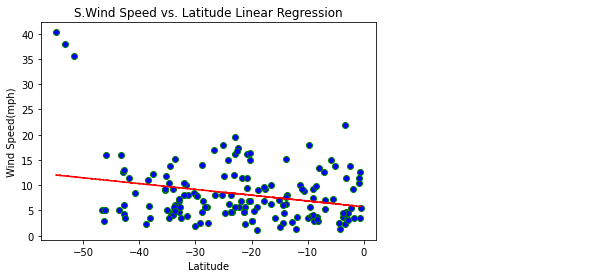

The r-squared value is 0.0633659106390999


<Figure size 432x288 with 0 Axes>

In [52]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("S.Wind Speed vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")
